<a href="https://colab.research.google.com/github/OmarFarukNoman/Into-to-Machine-Learning/blob/main/Homework-5/Problem_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Number of Iteration: 1000 
Loss: 8.642083

Final Parameter Values:
w2: 0.364139
w1: 0.250736
b: -0.301543


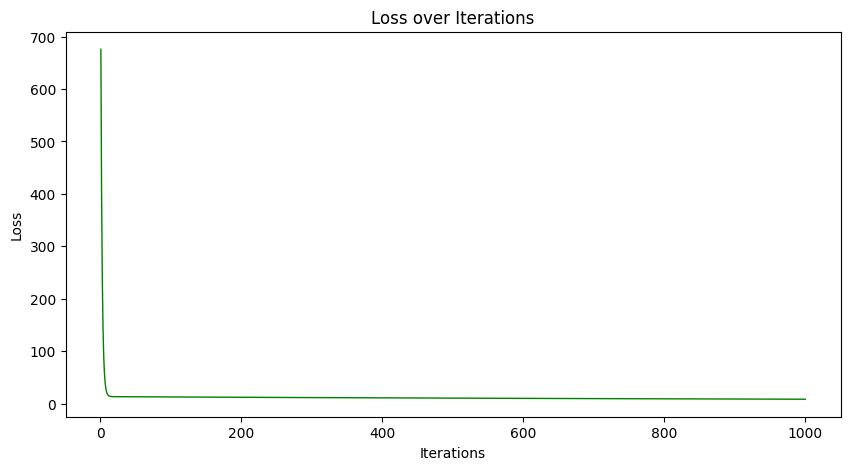

In [ ]:
import torch
import torch.optim as optim
import matplotlib.pyplot as plt

# Temperature data is taken from 'Introduction to ML Lecture 8: Gradient Descent, BackPropagation in Pytorch' slide
t_c = torch.tensor([0.5, 14.0, 15.0, 28.0, 11.0, 8.0, 3.0, -4.0, 6.0, 13.0, 21.0])
t_u = torch.tensor([35.7, 55.9, 58.2, 81.9, 56.3, 48.9, 33.9, 21.8, 48.4, 60.4, 68.4])
t_un = 0.1 * t_u # This feature scaling was done to have numerical stability and prevent divergence.

# Non-linearity added to the model
def model(t_u, w2, w1, b):
    return w2 * t_u**2 + w1 * t_u + b

# Loss function
def loss_fn(t_p, t_c):
    squared_diffs = (t_p - t_c)**2
    return squared_diffs.mean()

# Training loop
def training_loop(n_epochs, optimizer, params, t_u, t_c):
    losses = []

    for epoch in range(1, n_epochs + 1):
        t_p = model(t_u, *params)
        loss = loss_fn(t_p, t_c)

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        losses.append(loss.item())

        if epoch == 1000:
            print('Number of Iteration: %d \nLoss: %f' % (epoch, float(loss)))

    return params, losses

# Parameters
params = torch.tensor([1.0, 1.0, 0.0], requires_grad=True)
learning_rate = 1e-4
optimizer = optim.SGD([params], lr=learning_rate)

# Train and get losses
params, losses = training_loop(
    n_epochs=1000,
    optimizer=optimizer,
    params=params,
    t_u=t_un,
    t_c=t_c)

# Print final parameter values
print("\nFinal Parameter Values:")
print(f"w2: {params[0].item():.6f}")
print(f"w1: {params[1].item():.6f}")
print(f"b: {params[2].item():.6f}")

# Plot loss over iterations
plt.figure(figsize=(10, 5))
plt.plot(range(1, 1001), losses, 'g-', linewidth=1)
plt.xlabel('Iterations')
plt.ylabel('Loss')
plt.title('Loss over Iterations')
plt.show()

In [ ]:
import torch
import torch.optim as optim

# Temperature data is taken from 'Introduction to ML Lecture 8: Gradient Descent, BackPropagation in Pytorch' slide
t_c = torch.tensor([0.5, 14.0, 15.0, 28.0, 11.0, 8.0, 3.0, -4.0, 6.0, 13.0, 21.0])
t_u = torch.tensor([35.7, 55.9, 58.2, 81.9, 56.3, 48.9, 33.9, 21.8, 48.4, 60.4, 68.4])
t_un = 0.1 * t_u # This feature scaling was done to have numerical stability and prevent divergence.

# Non-linearity added to the model
def model(t_u, w2, w1, b):
    return w2 * t_u**2 + w1 * t_u + b

# Loss function
def loss_fn(t_p, t_c):
    squared_diffs = (t_p - t_c)**2
    return squared_diffs.mean()

# Training loop
def training_loop(n_epochs, optimizer, params, t_u, t_c):
    for epoch in range(1, n_epochs + 1):
        t_p = model(t_u, *params)
        loss = loss_fn(t_p, t_c)

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        if epoch % 500 == 0:
            print('Number of iteration: %d \nLoss: %f' % (epoch, float(loss)))

    return params

# Four separate trainings with different learning rates
learning_rates = [0.1, 0.01, 0.001, 0.0001]

for lr in learning_rates:
    print(f"\nLearning rate: {lr}")
    params = torch.tensor([1.0, 1.0, 0.0], requires_grad=True)
    optimizer = optim.SGD([params], lr=lr)

    final_params = training_loop(
        n_epochs=5000,
        optimizer=optimizer,
        params=params,
        t_u=t_un,
        t_c=t_c)

    # Print final parameter values
    print(f"Final parameters - w2: {final_params[0].item():.6f}, w1: {final_params[1].item():.6f}, b: {final_params[2].item():.6f}")


Learning rate: 0.1
Number of iteration: 500 
Loss: nan
Number of iteration: 1000 
Loss: nan
Number of iteration: 1500 
Loss: nan
Number of iteration: 2000 
Loss: nan
Number of iteration: 2500 
Loss: nan
Number of iteration: 3000 
Loss: nan
Number of iteration: 3500 
Loss: nan
Number of iteration: 4000 
Loss: nan
Number of iteration: 4500 
Loss: nan
Number of iteration: 5000 
Loss: nan
Final parameters - w2: nan, w1: nan, b: nan

Learning rate: 0.01
Number of iteration: 500 
Loss: nan
Number of iteration: 1000 
Loss: nan
Number of iteration: 1500 
Loss: nan
Number of iteration: 2000 
Loss: nan
Number of iteration: 2500 
Loss: nan
Number of iteration: 3000 
Loss: nan
Number of iteration: 3500 
Loss: nan
Number of iteration: 4000 
Loss: nan
Number of iteration: 4500 
Loss: nan
Number of iteration: 5000 
Loss: nan
Final parameters - w2: nan, w1: nan, b: nan

Learning rate: 0.001
Number of iteration: 500 
Loss: nan
Number of iteration: 1000 
Loss: nan
Number of iteration: 1500 
Loss: nan
N

Linear Models:
Learning Rate: 0.1, Final Loss = nan
Learning Rate: 0.01, Final Loss = 2.9276
Learning Rate: 0.001, Final Loss = 7.8514
Learning Rate: 0.0001, Final Loss = 25.6377

Non-linear Models:
Learning Rate: 0.1, Final Loss = nan
Learning Rate: 0.01, Final Loss = nan
Learning Rate: 0.001, Final Loss = nan
Learning Rate: 0.0001, Final Loss = 3.8617

MODEL COMPARISON
Linear Model Final Loss:    2.9276
Best Linear Learning Rate:  0.01
Linear Parameters:          w=5.3671, b=-17.3012

Non-linear Model Final Loss: 3.8617
Best Non-linear Learning Rate: 0.0001
Non-linear Parameters:      w2=0.5570, w1=-0.8881, b=-0.8753


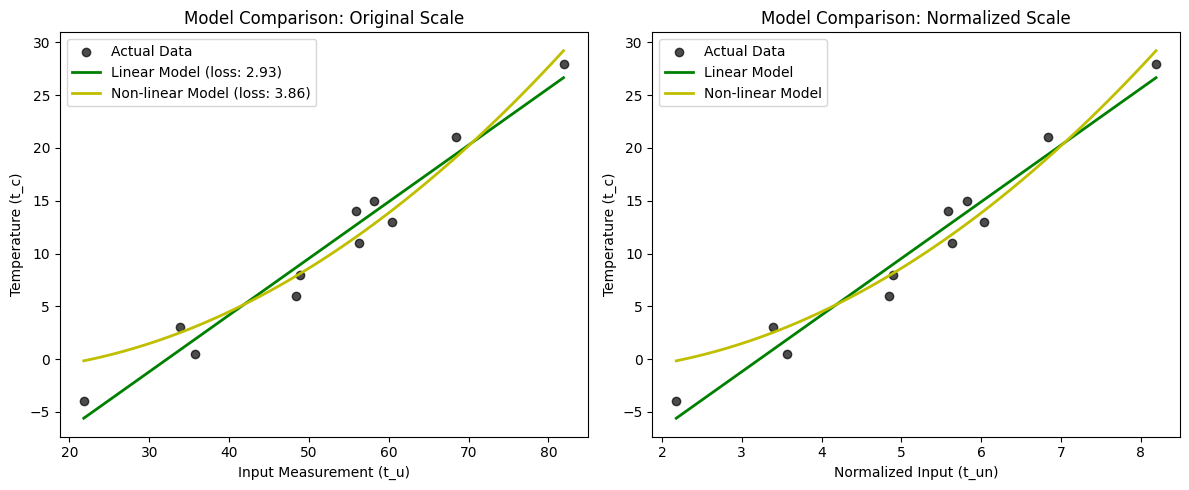

In [ ]:
import torch
import torch.optim as optim
import matplotlib.pyplot as plt
import numpy as np

# Temperature data is taken from 'Introduction to ML Lecture 8: Gradient Descent, BackPropagation in Pytorch' slide
t_c = torch.tensor([0.5, 14.0, 15.0, 28.0, 11.0, 8.0, 3.0, -4.0, 6.0, 13.0, 21.0])
t_u = torch.tensor([35.7, 55.9, 58.2, 81.9, 56.3, 48.9, 33.9, 21.8, 48.4, 60.4, 68.4])
t_un = 0.1 * t_u

# Linear model
def linear_model(t_u, w, b):
    return w * t_u + b

# Non-linear model
def nonlinear_model(t_u, w2, w1, b):
    return w2 * t_u**2 + w1 * t_u + b

# Loss function
def loss_fn(t_p, t_c):
    squared_diffs = (t_p - t_c)**2
    return squared_diffs.mean()

# Training function
def training_loop(n_epochs, optimizer, params, t_u, t_c, model_func):
    for epoch in range(1, n_epochs + 1):
        t_p = model_func(t_u, *params)
        loss = loss_fn(t_p, t_c)

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

    return loss.item(), params

# Training linear models with four different learning rates
learning_rates = [0.1, 0.01, 0.001, 0.0001]
best_linear_loss = float('inf')
best_linear_params = None
best_linear_lr = None

print("Linear Models:")
for lr in learning_rates:
    params = torch.tensor([1.0, 0.0], requires_grad=True)
    optimizer = optim.SGD([params], lr=lr)
    loss, final_params = training_loop(5000, optimizer, params, t_un, t_c, linear_model)

    if loss < best_linear_loss:
        best_linear_loss = loss
        best_linear_params = final_params
        best_linear_lr = lr

    print(f"Learning Rate: {lr}, Final Loss = {loss:.4f}")

# Training non-linear models with four different learning rates
best_nonlinear_loss = float('inf')
best_nonlinear_params = None
best_nonlinear_lr = None

print("\nNon-linear Models:")
for lr in learning_rates:
    params = torch.tensor([1.0, 1.0, 0.0], requires_grad=True)
    optimizer = optim.SGD([params], lr=lr)
    loss, final_params = training_loop(5000, optimizer, params, t_un, t_c, nonlinear_model)

    if loss < best_nonlinear_loss:
        best_nonlinear_loss = loss
        best_nonlinear_params = final_params
        best_nonlinear_lr = lr

    print(f"Learning Rate: {lr}, Final Loss = {loss:.4f}")

# Results comparison
print("\nMODEL COMPARISON")
print(f"Linear Model Final Loss:    {best_linear_loss:.4f}")
print(f"Best Linear Learning Rate:  {best_linear_lr}")
print(f"Linear Parameters:          w={best_linear_params[0].item():.4f}, b={best_linear_params[1].item():.4f}")
print()
print(f"Non-linear Model Final Loss: {best_nonlinear_loss:.4f}")
print(f"Best Non-linear Learning Rate: {best_nonlinear_lr}")
print(f"Non-linear Parameters:      w2={best_nonlinear_params[0].item():.4f}, w1={best_nonlinear_params[1].item():.4f}, b={best_nonlinear_params[2].item():.4f}")

# Visualization
plt.figure(figsize=(12, 5))

# Generate smooth range for plotting
t_u_range = torch.linspace(t_u.min(), t_u.max(), 100)
t_un_range = 0.1 * t_u_range

# Calculate predictions
linear_predictions = linear_model(t_un_range, *best_linear_params)
nonlinear_predictions = nonlinear_model(t_un_range, *best_nonlinear_params)

# Plot 1: Original scale
plt.subplot(1, 2, 1)
plt.scatter(t_u, t_c, color='black', label='Actual Data', alpha=0.7)
plt.plot(t_u_range, linear_predictions.detach().numpy(), 'g-', label=f'Linear Model (loss: {best_linear_loss:.2f})', linewidth=2)
plt.plot(t_u_range, nonlinear_predictions.detach().numpy(), 'y-', label=f'Non-linear Model (loss: {best_nonlinear_loss:.2f})', linewidth=2)
plt.xlabel('Input Measurement (t_u)')
plt.ylabel('Temperature (t_c)')
plt.title('Model Comparison: Original Scale')
plt.legend()

# Plot 2: Normalized scale
plt.subplot(1, 2, 2)
plt.scatter(t_un, t_c, color='black', label='Actual Data', alpha=0.7)
plt.plot(t_un_range, linear_predictions.detach().numpy(), 'g-', label=f'Linear Model', linewidth=2)
plt.plot(t_un_range, nonlinear_predictions.detach().numpy(), 'y-', label=f'Non-linear Model', linewidth=2)
plt.xlabel('Normalized Input (t_un)')
plt.ylabel('Temperature (t_c)')
plt.title('Model Comparison: Normalized Scale')
plt.legend()
plt.tight_layout()
plt.show()